<a href="https://colab.research.google.com/github/trirop/Kayakcounter/blob/master/Kayakcounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.2


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/Kayakcounter/'

/content/gdrive/My Drive/Kayakcounter


Only execute the next command, if you want to develop a NN from the scratch !

In [ ]:
!git clone https://github.com/tensorflow/models.git

In [5]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install tf_slim
!pip install Pillow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,791 kB of archives.
After this operation, 7,807 kB of additional disk space will be used.
Get:1 htt

In [6]:
%cd /content/gdrive/My Drive/Kayakcounter/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/Kayakcounter/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [7]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/Kayakcounter/models/research/:/content/gdrive/My Drive/Kayakcounter/models/research/slim'

In [8]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/graph_rewriter_pb2.py -> build/lib/object

In [11]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.744755417572128


In [12]:
%cd /content/gdrive/My Drive/Kayakcounter/models/research/object_detection/builders/
!python model_builder_test.py

/content/gdrive/My Drive/Kayakcounter/models/research/object_detection/builders


In [13]:
%cd /content/gdrive/My Drive/Kayakcounter/models/research/object_detection/

/content/gdrive/My Drive/Kayakcounter/models/research/object_detection


In [14]:
!rm -rf trained_inference_graph

In [15]:
!rm -rf tflite

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
def main(directory_list):
    for Image_cat in directory_list:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(Image_cat))
        xml_df = xml_to_csv(image_path) 
        xml_df.to_csv('data/{}_labels.csv'.format(Image_cat), index=None)
        print('Successfully converted xml to csv.')
main(['train','test'])

In [ ]:
!python generate_tfrecord.py --label0='Kayak' --label1='Rubberboat' --label2='Standuppaddler' --csv_input=data/train_labels.csv --output_path=data/train.record --img_path=images/train

In [ ]:
!python generate_tfrecord.py --label0=Kayak --label1=Rubberboat --label2=Standuppaddler --csv_input=data/test_labels.csv --output_path=data/test.record --img_path=images/test

We can download different models there

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz
!tar -xvf ssd_mobilenet_v1_coco_11_06_2017.tar.gz

In [16]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
!tar -xvf ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz

--2020-08-13 04:54:03--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144806142 (138M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’

ssd_mobilenet_v2_qu 100%[===================>] 138.10M  57.2MB/s    in 2.4s    

2020-08-13 04:54:06 (57.2 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’ saved [144806142/144806142]

ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.data-00000-of-00001
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.index
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.meta
ssd_mobilenet_v2_quantiz

Another model for Android and iPhone Development in TFLite Format can be downloaded


In [ ]:
!wget https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_mobilenet_v1_coco.config

In [18]:
!wget https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config

--2020-08-13 04:54:43--  https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco.config’

ssd_mobilenet_v2_qu     [ <=>                ] 146.68K  --.-KB/s    in 0.03s   

2020-08-13 04:54:44 (5.58 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco.config’ saved [150200]



In [19]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.656895769900746


In [20]:
pip install tensorboardcolab

In [21]:
%load_ext tensorboard

In [22]:
%tensorboard --logdir training/

In [23]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=ssd_mobilenet_v1_coco.config

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
I0813 05:07:28.967894 140114298615680 learning.py:512] global step 136062: loss = 1.1702 (0.503 sec/step)
INFO:tensorflow:global step 136063: loss = 1.0642 (0.709 sec/step)
I0813 05:07:29.678874 140114298615680 learning.py:512] global step 136063: loss = 1.0642 (0.709 sec/step)
INFO:tensorflow:global step 136064: loss = 1.2698 (0.552 sec/step)
I0813 05:07:30.242469 140114298615680 learning.py:512] global step 136064: loss = 1.2698 (0.552 sec/step)
INFO:tensorflow:global step 136065: loss = 1.3160 (1.049 sec/step)
I0813 05:07:31.351155 140114298615680 learning.py:512] global step 136065: loss = 1.3160 (1.049 sec/step)
INFO:tensorflow:global step 136066: loss = 1.3165 (0.586 sec/step)
I0813 05:07:31.984714 140114298615680 learning.py:512] global step 136066: loss = 1.3165 (0.586 sec/step)
INFO:tensorflow:global step 136067: loss = 1.3489 (1.162 sec/step)
I0813 05:07:33.147651 140114298615680 learning.py:512] global step 1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-2cdeaa08216a>", line 1, in <module>
    get_ipython().system('python train.py --logtostderr --train_dir=training/ --pipeline_config_path=ssd_mobilenet_v1_coco.config')
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_shell.py", line 102, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 438, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 195, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/lib/python3.6/contextlib.py", line 88, in __e

KeyboardInterrupt: ignored

In [ ]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=ssd_mobilenet_v2_quantized_300x300_coco.config

Alert: Change the model.ckpt number and clean the folder trained-inference-graph !!!

In [24]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path ssd_mobilenet_v1_coco.config --trained_checkpoint_prefix training/model.ckpt-137453 --output_directory trained_inference_graph/

Instructions for updating:
Please use `layer.__call__` method instead.
W0813 05:29:32.609404 140591734499200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:29:34.038537 140591734499200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:29:34.077683 140591734499200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:29:34.111688 140591734499200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [25]:
!zip -r Kayakcounter_exp_graph.zip trained_inference_graph

updating: trained_inference_graph/ (stored 0%)
updating: trained_inference_graph/model.ckpt.data-00000-of-00001 (deflated 7%)
updating: trained_inference_graph/model.ckpt.index (deflated 68%)
updating: trained_inference_graph/checkpoint (deflated 42%)
updating: trained_inference_graph/model.ckpt.meta (deflated 94%)
updating: trained_inference_graph/frozen_inference_graph.pb (deflated 9%)
updating: trained_inference_graph/saved_model/ (stored 0%)
updating: trained_inference_graph/saved_model/variables/ (stored 0%)
updating: trained_inference_graph/saved_model/saved_model.pb (deflated 9%)
updating: trained_inference_graph/pipeline.config (deflated 69%)


Alert: Change the model.ckt number and clean the the tflite folder

In [27]:
!python export_tflite_ssd_graph.py  --pipeline_config_path ssd_mobilenet_v1_coco.config --trained_checkpoint_prefix=training/model.ckpt-137453 --output_directory=tflite --add_postprocessing_op=true

Instructions for updating:
Please use `layer.__call__` method instead.
W0813 05:35:59.561110 140159229446016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:36:01.021940 140159229446016 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:36:01.049591 140159229446016 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0813 05:36:01.076695 140159229446016 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
!python export_tflite_ssd_graph.py --pipeline_config_path ssd_mobilenet_v2_quantized_300x300_coco.config  --trained_checkpoint_prefix=training/model.ckpt-88650 --output_directory=tflite --add_postprocessing_op=true

In [28]:
!zip -r Kayakcounter_tflite.zip tflite

updating: tflite/ (stored 0%)
updating: tflite/tflite_graph.pb (deflated 7%)
updating: tflite/tflite_graph.pbtxt (deflated 56%)


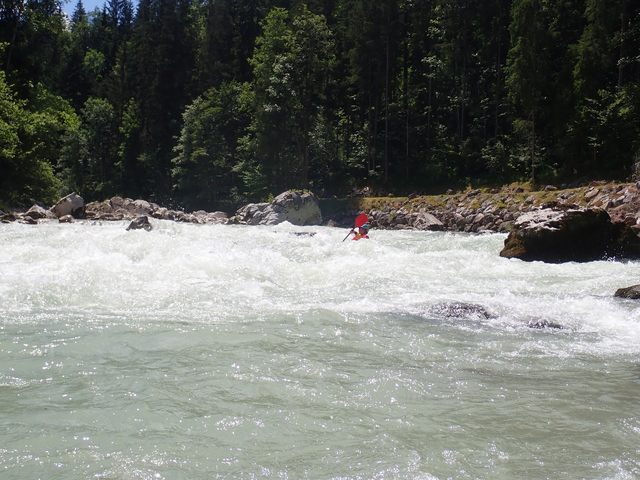

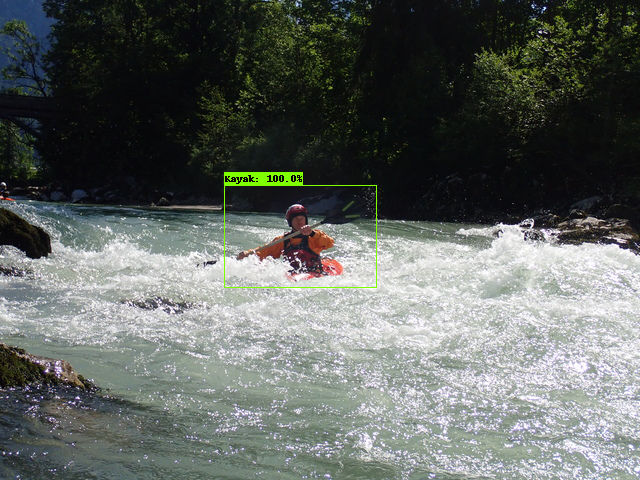

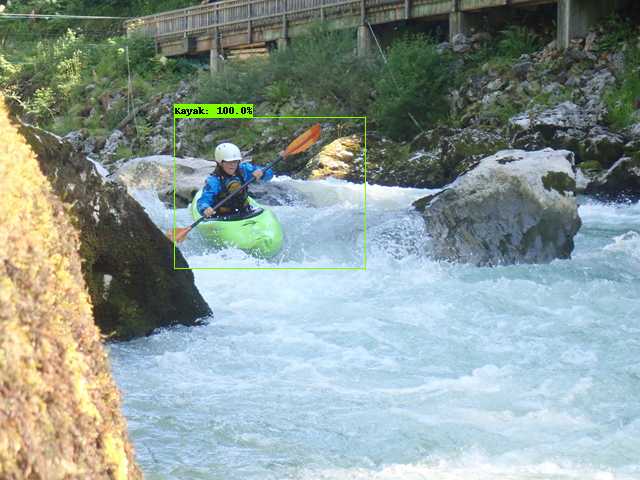

In [29]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



### Model preparation variable
MODEL_NAME = 'trained_inference_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/label_map.pbtxt'
NUM_CLASSES = 1 #remember number of objects you are training? cool.


### Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


###Loading label map
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)




### Load image into numpy function
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




###STATING THE PATH TO IMAGES TO BE TESTED
PATH_TO_TEST_IMAGES_DIR = 'test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4) ]
IMAGE_SIZE = (12, 8)




### Function to run inference on a single image which will later be used in an iteration
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict



### To iterate on each image in the test image path defined 
### NB define the range of numbers and let it match the number of imAGES IN TEST FOLDER +1
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=1)
  display(Image.fromarray(image_np))